In [1]:
from qiskit import *
from qiskit.visualization import plot_bloch_multivector
from qiskit.visualization import plot_histogram
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
IBMQ.load_account()

/opt/anaconda3/lib/python3.8/site-packages/qiskit/providers/ibmq/ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [3]:
matplotlib inline

In [4]:
my_provider = IBMQ.get_provider()
my_provider.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_vigo') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_ourense') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_valencia') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_athens') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q', group='open', project='main')>]

In [16]:
simulator = my_provider.get_backend('ibmq_5_yorktown')

In [17]:
# Making the quantum circuit
def circuitI(gamma, beta, J, h1, h2):
    qc = QuantumCircuit(2, 2)
    qc.h([0, 1])
    qc.h(1)
    qc.cz(0,1)
    qc.rx(2*gamma*J, 1)
    qc.cz(0,1)
    qc.h(1)
    qc.i(0)
    qc.rz(2*gamma*h1, 0)
    qc.rz(2*gamma*h2, 1)
    qc.rx(2*beta, 0)
    qc.rx(2*beta, 1)
    qc.measure([0,1], [0,1])
    return qc

In [35]:
# Initializing the variables for A.
J = 0.5
h1 = -0.5
h2 = 0

#Setting the dimesions of the pasephase. The amount of simulated points = n**2
n = 61
p = np.pi/(n-1)
res = np.zeros([n, n, 4])


# Running a simulation for each point
for i in range(n):
    qc_list = []
    gamma = i*p
    for j in range(n):
        beta = j*p
        qc = circuitI(gamma, beta, J, h1, h2)       
        qc_list.append(qc)
    transpiled_circs = transpile(qc_list, backend=simulator)
    job = execute(transpiled_circs, backend = simulator, shots=1000 )
    for circ_index in range(len(transpiled_circs)):
        counts = job.result().get_counts(qc_list[circ_index])
        res[i][circ_index][:] = np.array([int(counts.get('00', 0)), int(counts.get('01', 0)), int(counts.get('10', 0)),
                            int(counts.get('11', 0))])


In [37]:
print(res)

[[[291. 233. 226. 250.]
  [251. 252. 266. 231.]
  [292. 250. 251. 207.]
  ...
  [235. 267. 275. 223.]
  [264. 262. 243. 231.]
  [300. 240. 234. 226.]]

 [[310. 219. 202. 269.]
  [289. 275. 218. 218.]
  [333. 258. 213. 196.]
  ...
  [320. 270. 200. 210.]
  [291. 275. 238. 196.]
  [315. 201. 205. 279.]]

 [[336. 233. 188. 243.]
  [315. 272. 215. 198.]
  [293. 243. 239. 225.]
  ...
  [326. 259. 225. 190.]
  [285. 240. 243. 232.]
  [352. 203. 206. 239.]]

 ...

 [[300. 288. 176. 236.]
  [232. 285. 342. 141.]
  [241. 291. 328. 140.]
  ...
  [231. 322. 320. 127.]
  [238. 310. 315. 137.]
  [302. 281. 195. 222.]]

 [[300. 272. 181. 247.]
  [258. 292. 327. 123.]
  [268. 298. 303. 131.]
  ...
  [227. 318. 308. 147.]
  [252. 303. 305. 140.]
  [306. 282. 166. 246.]]

 [[269. 365. 191. 175.]
  [291. 204. 272. 233.]
  [325. 228. 259. 188.]
  ...
  [292. 224. 278. 206.]
  [286. 228. 276. 210.]
  [265. 348. 188. 199.]]]


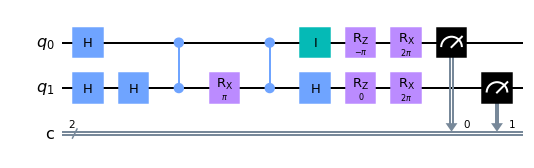

In [38]:
#Draw the current circuit
qc.draw(output='mpl')

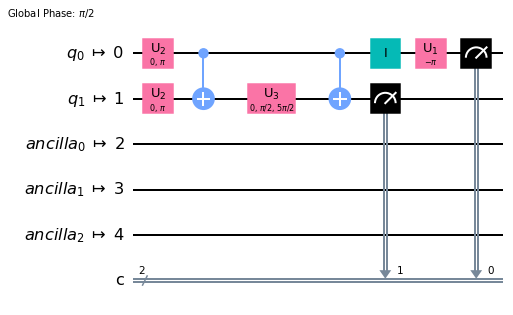

In [45]:
transpiled_circs[0].draw(output='mpl')

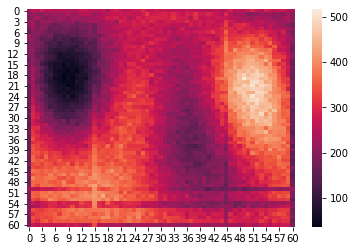

In [43]:
# Making a heatmap plot
sns.heatmap(res[:, :, 2])